In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
df = pd.read_csv('Breast Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
cat = df['diagnosis'].unique()
cat

array(['M', 'B'], dtype=object)

In [5]:
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.isna().sum().sum()

569

In [8]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df = df.drop('Unnamed: 32' , axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df = df.drop('id' , axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


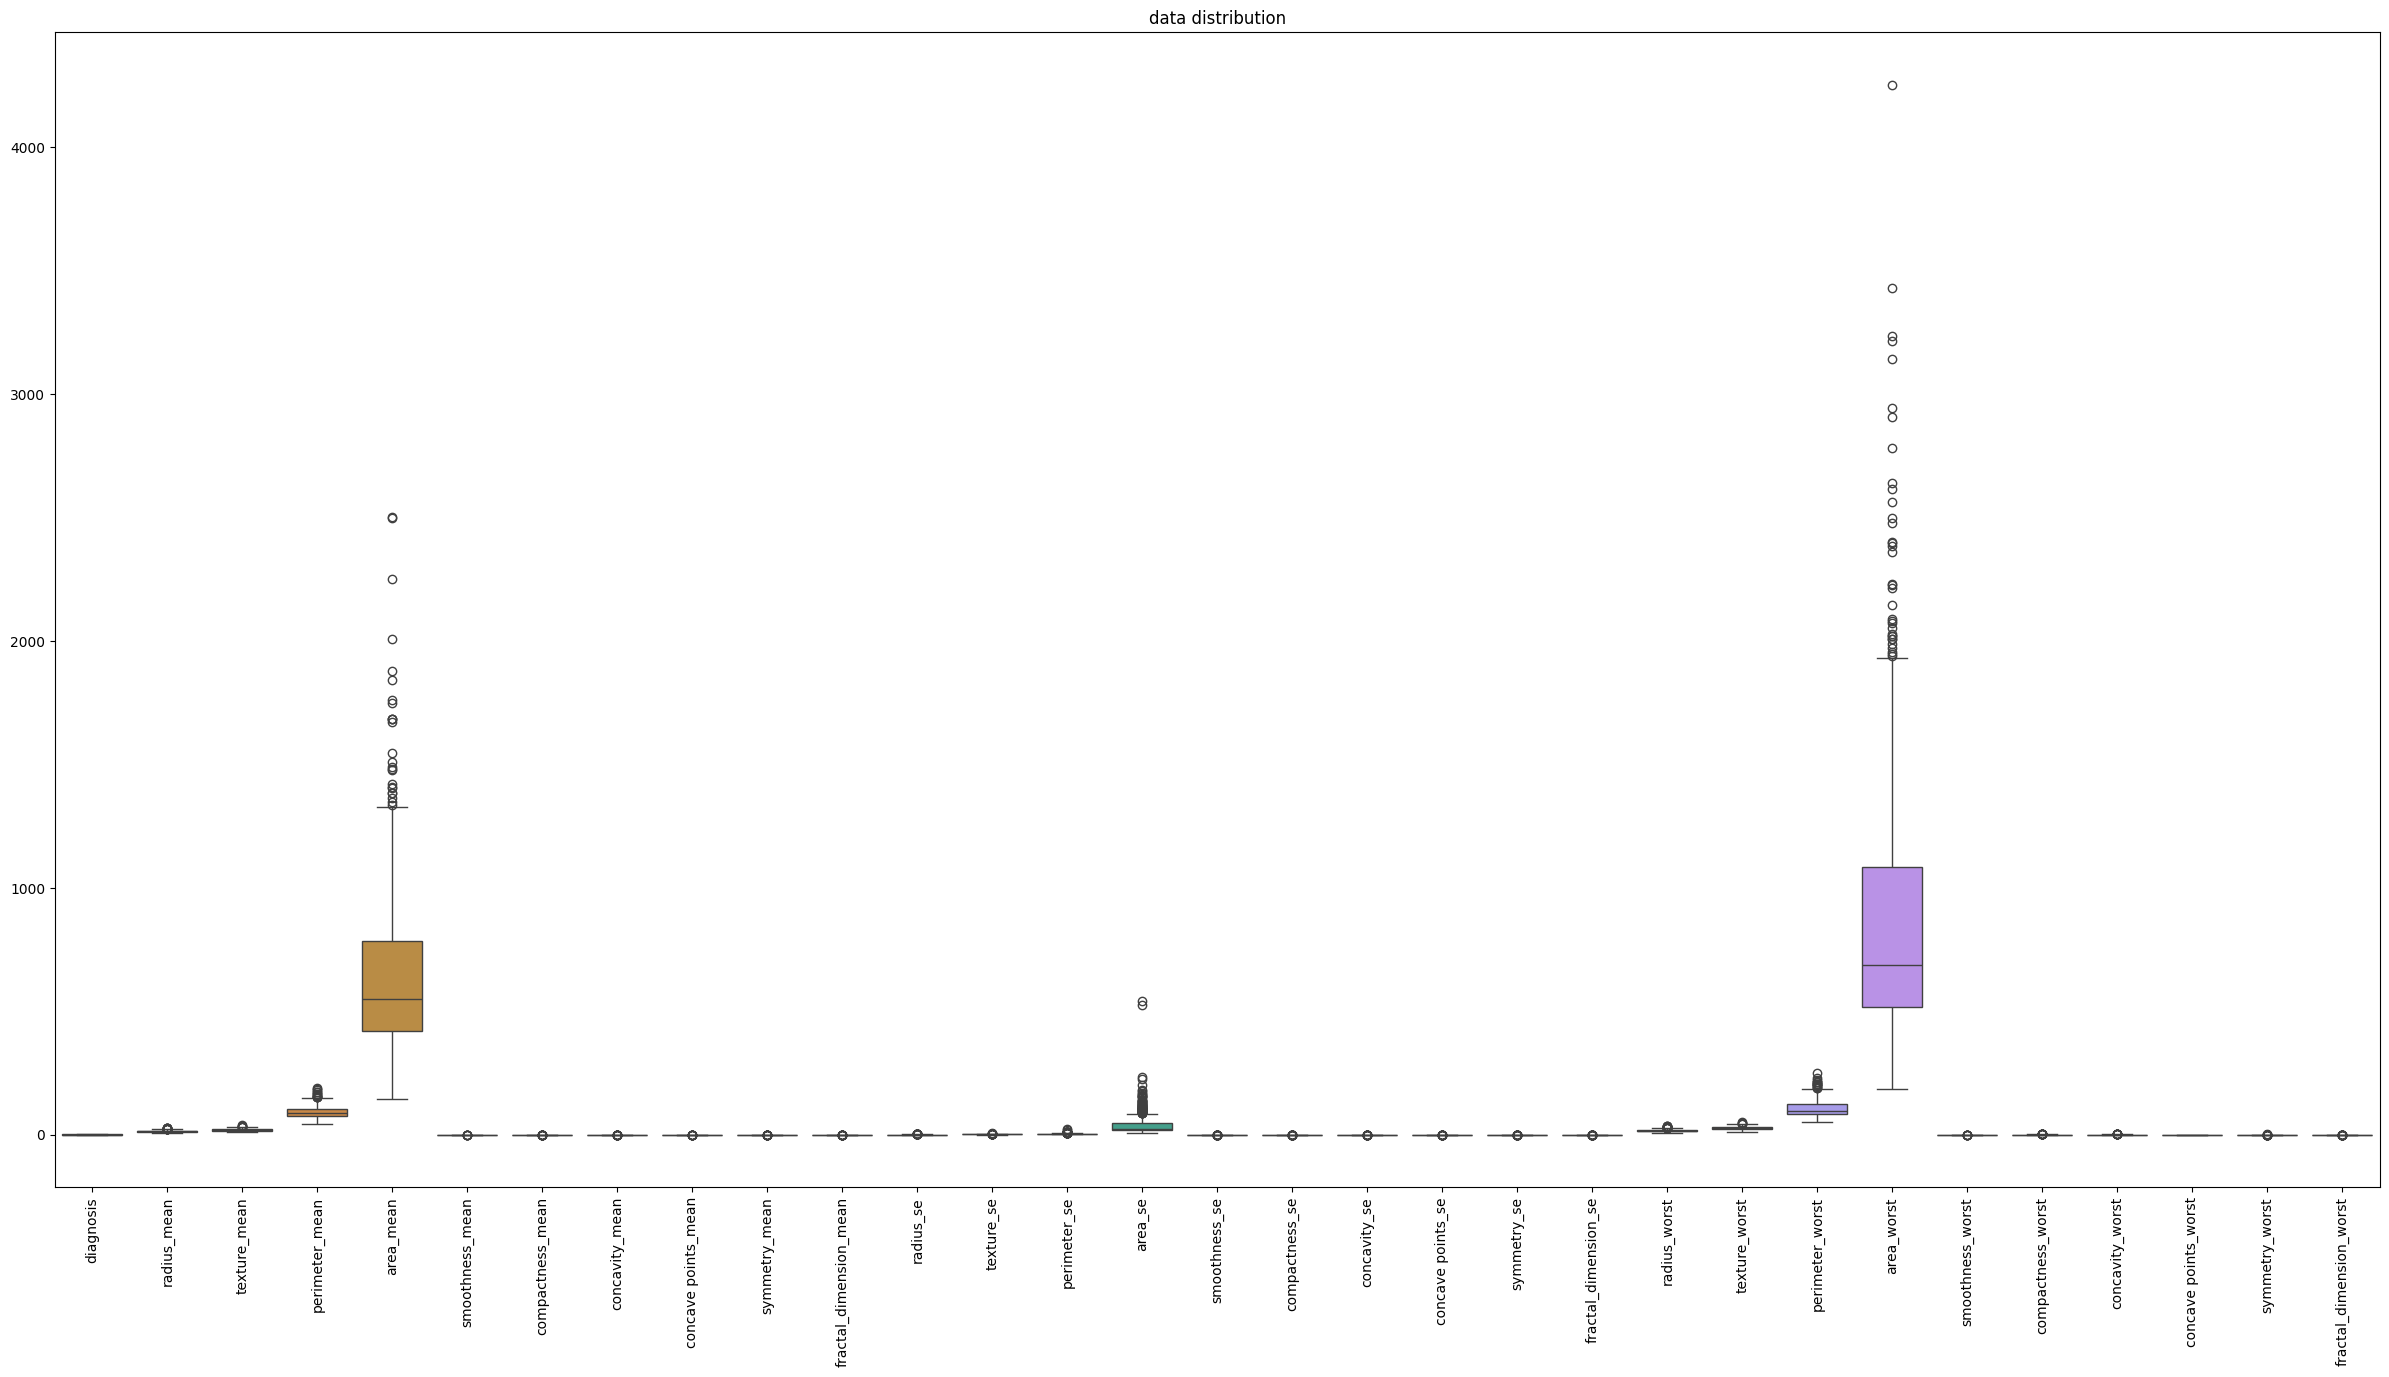

In [12]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df , notch=False )  
plt.title("data distribution")
l=list(np.arange(31))
plt.xticks(l, list(df.columns),rotation=90)
plt.show()

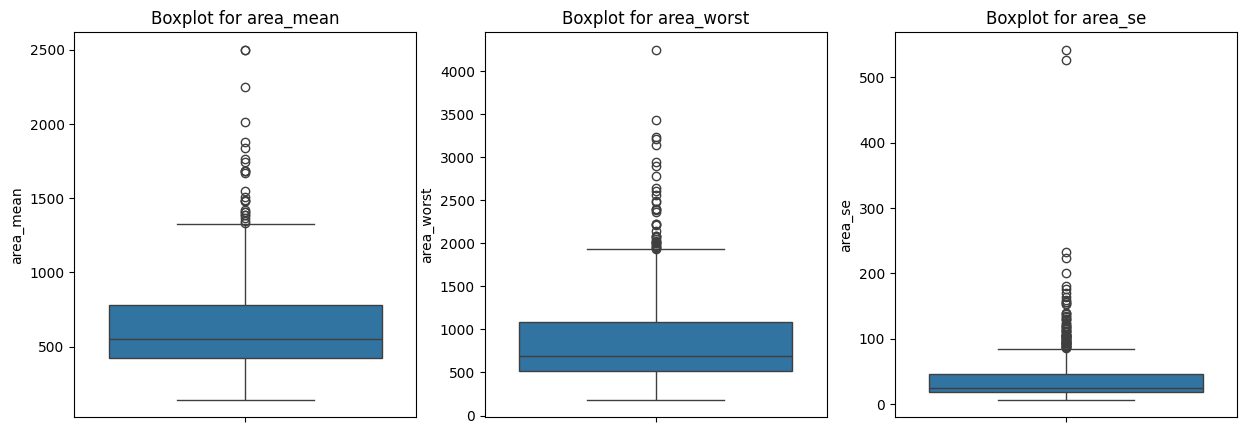

In [13]:
columns_to_plot = ['area_mean', 'area_worst', 'area_se']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()

### Remove outliers from this columns 
* Using Z-Scores
* Using Custom Function

##### 1- Using Z-Scores

In [14]:
columns_to_plot = ['area_mean', 'area_worst', 'area_se']

df_cleaned_zscore = df[(np.abs(stats.zscore(df[columns_to_plot])) < 2.5).all(axis=1)]


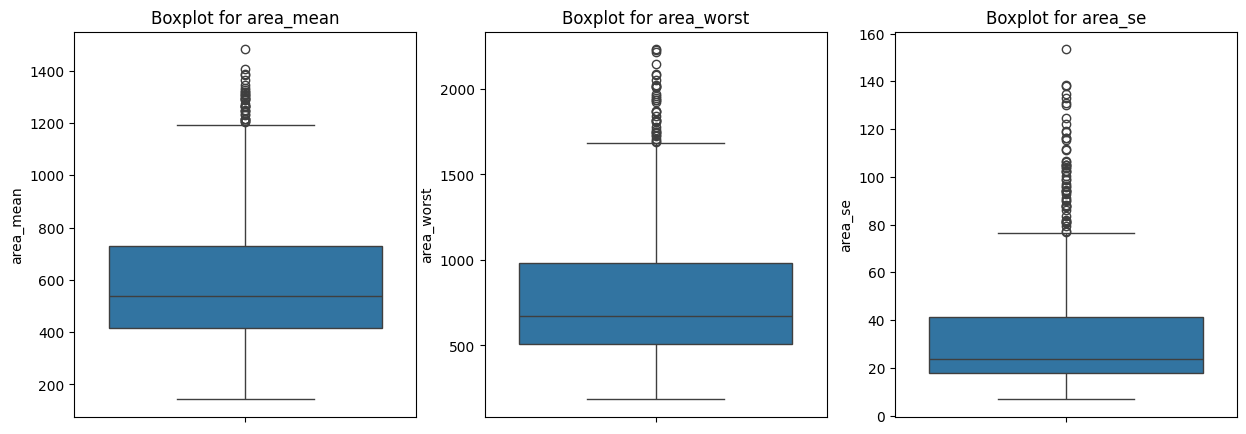

In [15]:
columns_to_plot = ['area_mean', 'area_worst', 'area_se']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df_cleaned_zscore[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()

In [16]:
print(f'The data before removing outliers: {df.shape}')
print(f'The data after removing outliers by using zscore: {df_cleaned_zscore.shape}')

The data before removing outliers: (569, 31)
The data after removing outliers by using zscore: (548, 31)


##### 2- Using Custom Function

In [17]:
def remove_outliers(df, columns, n_std):
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[df[col] <= mean + (n_std * sd)]
    return df

# Usage
df_cleaned_custom_fu = remove_outliers(df, columns_to_plot, n_std=3)


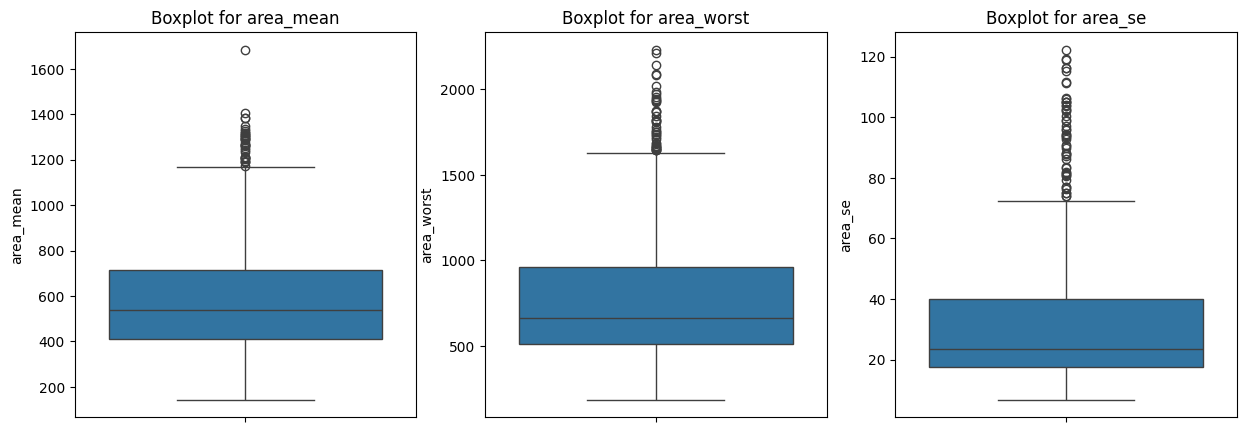

In [18]:

columns_to_plot = ['area_mean', 'area_worst', 'area_se']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df_cleaned_custom_fu[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()


In [19]:
print(f'The data before removing outliers: {df.shape}')
print(f'The data after removing outliers by using custom function: {df_cleaned_zscore.shape}')

The data before removing outliers: (569, 31)
The data after removing outliers by using custom function: (548, 31)


#### Heat map

<Axes: >

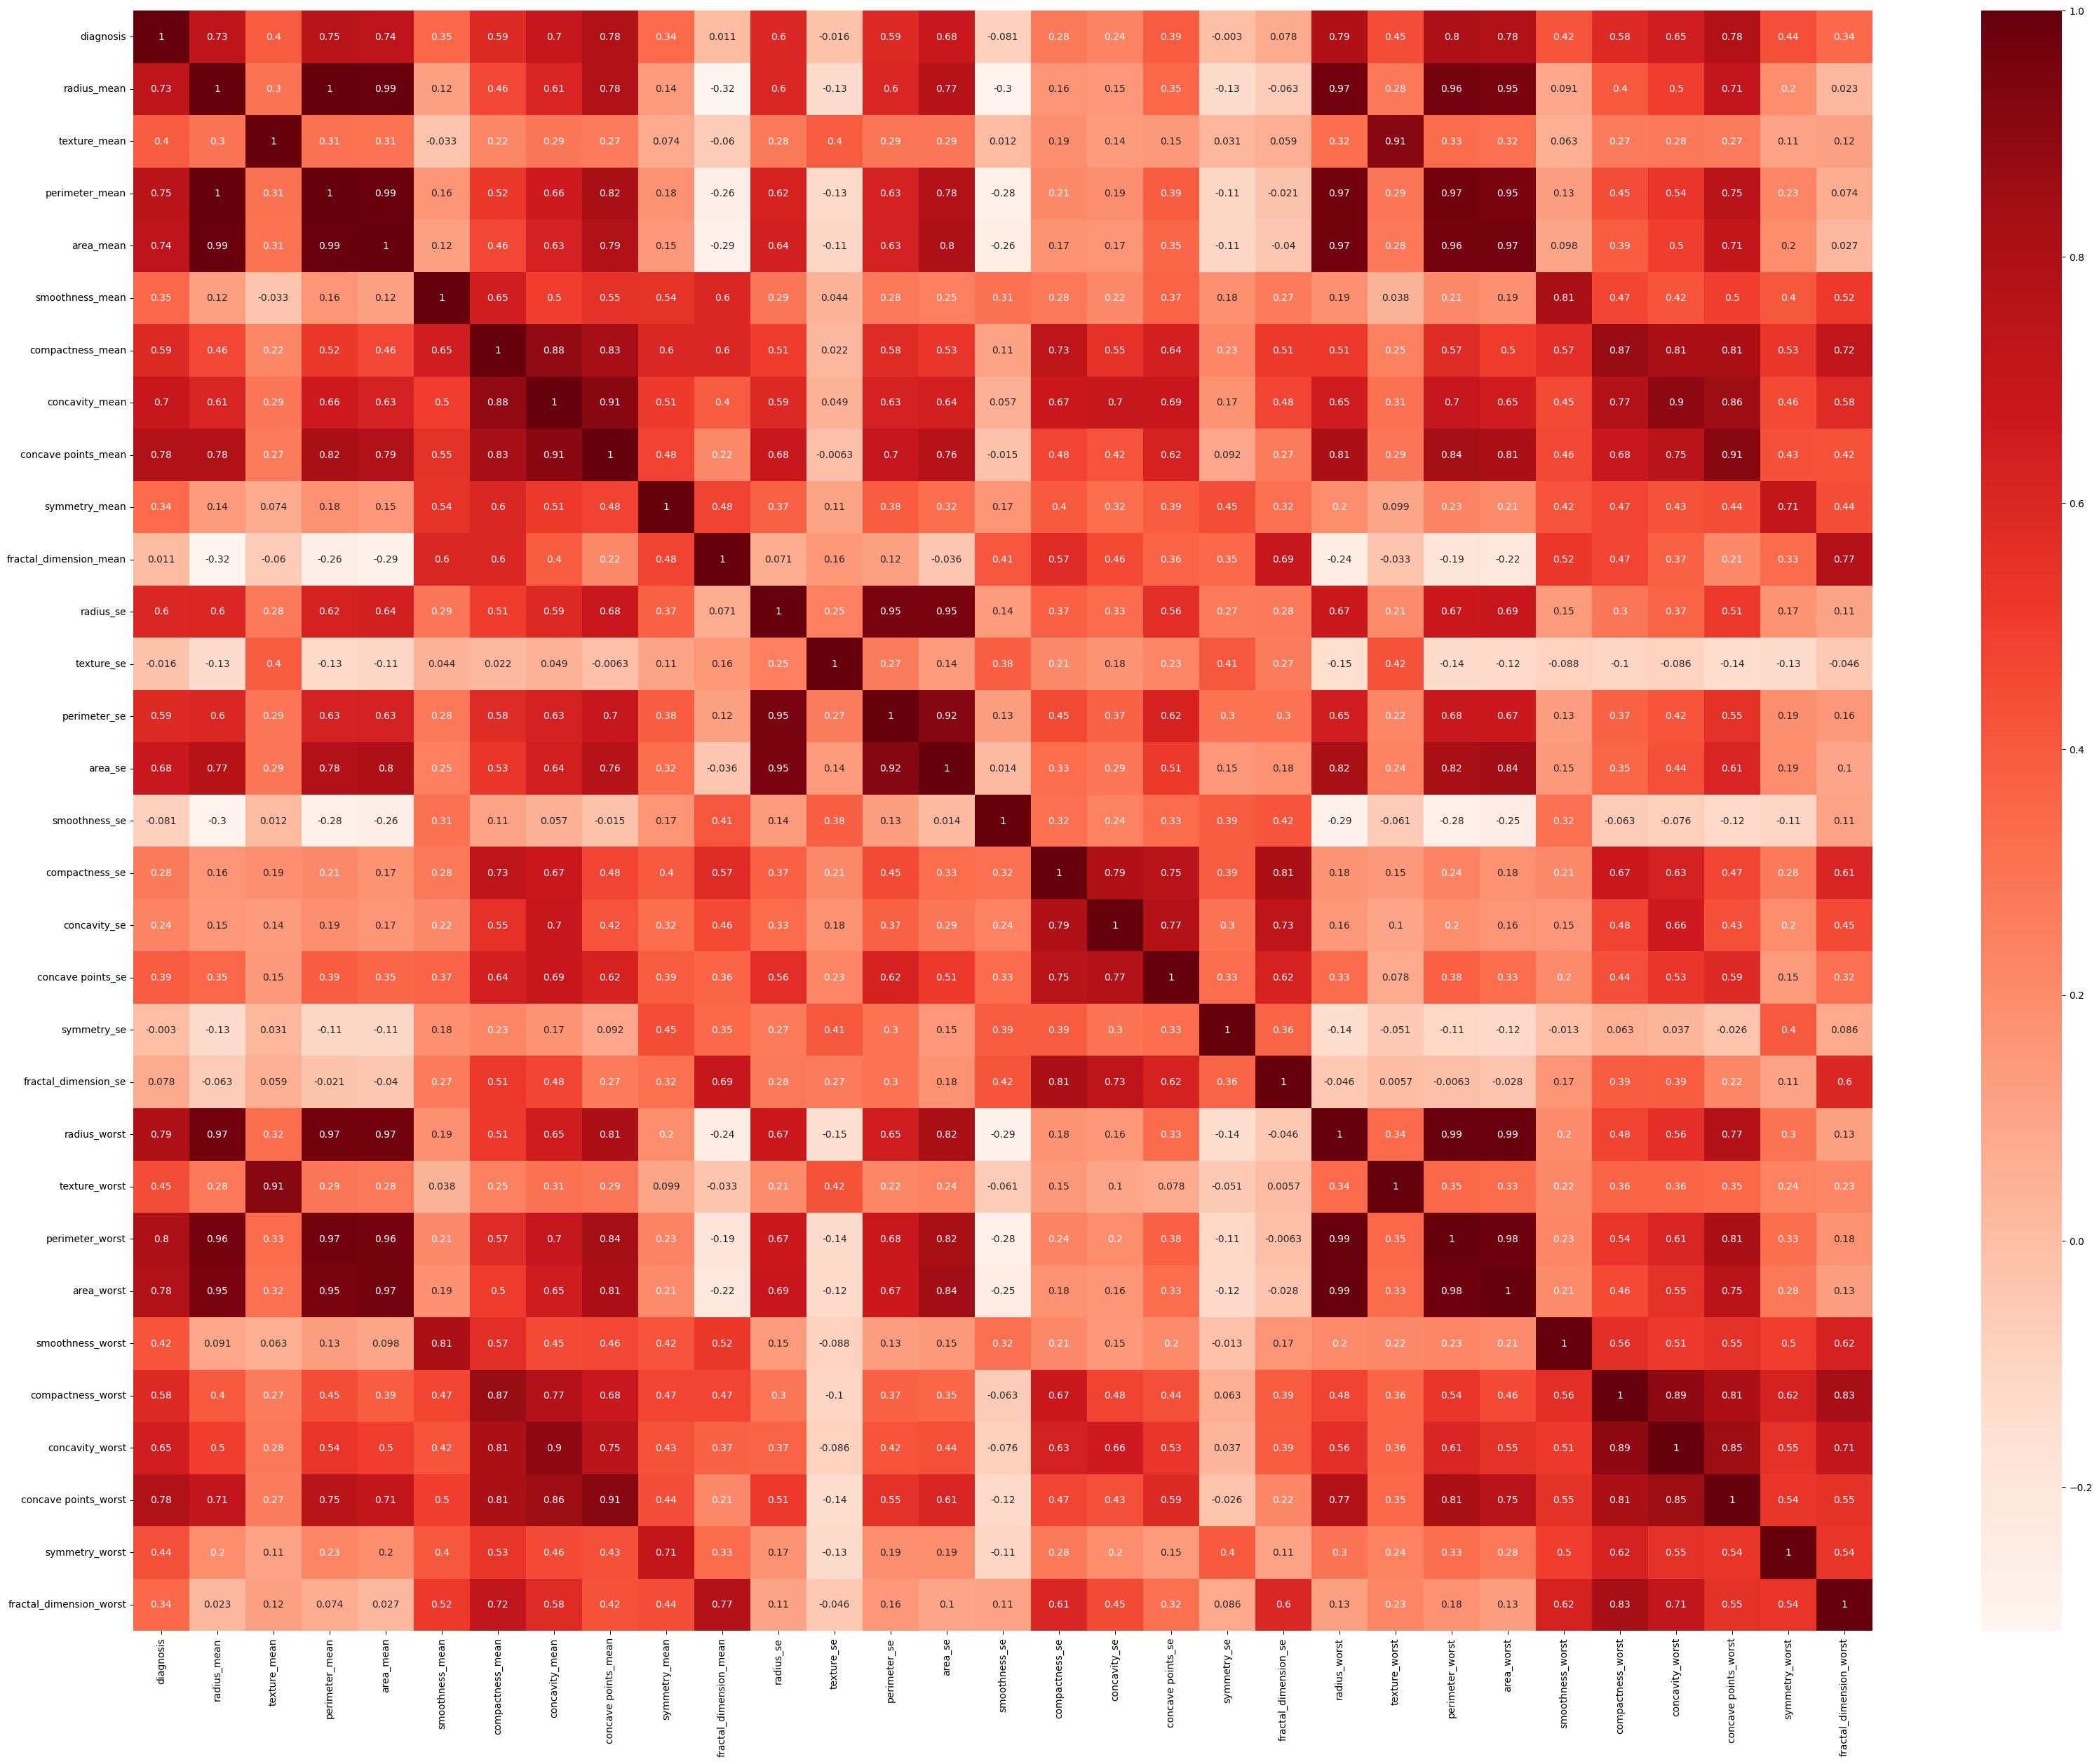

In [20]:
df_heatmap = df_cleaned_zscore.corr()
plt.figure(figsize=(40,30))
sns.heatmap(df_heatmap,annot=True,cmap='Reds')

In [21]:
X = df_cleaned_zscore.drop('diagnosis', axis=1)
y = df_cleaned_zscore['diagnosis']

In [22]:
stander = StandardScaler()
X = stander.fit_transform(X)

# models

Classification 

1- Logistic Regression

2- Decision Trees

3- Random Forest

4- Support Vector Machines (SVM)

5- K-Nearest Neighbors (k-NN)

6- Naive Bayes

In [23]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# accuracy
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score , ConfusionMatrixDisplay , classification_report

In [24]:
models = {'Logistic':LogisticRegression() , 'DecisionTree': DecisionTreeClassifier(),
          'RandomForest':RandomForestClassifier() , 'Svm':SVC() , 'KNN':KNeighborsClassifier() , 'Naive Bayes':GaussianNB() }

In [25]:
results = []
for model in models.values():
    kf = KFold(n_splits=5, shuffle=True, random_state=42) 
    cv_result = cross_val_score(model,X,y,cv=kf)
    results.append(cv_result)

In [26]:
results

[array([1.        , 0.99090909, 0.93636364, 0.99082569, 0.95412844]),
 array([0.90909091, 0.92727273, 0.9       , 0.93577982, 0.88990826]),
 array([0.95454545, 0.96363636, 0.92727273, 0.98165138, 0.95412844]),
 array([0.98181818, 0.98181818, 0.95454545, 0.99082569, 0.94495413]),
 array([0.96363636, 0.97272727, 0.95454545, 0.98165138, 0.93577982]),
 array([0.95454545, 0.93636364, 0.91818182, 0.95412844, 0.9266055 ])]

In [27]:
for result in results:
    print(result.mean())

0.9744453711426189
0.9124103419516263
0.9562468723936615
0.9707923269391159
0.9616680567139284
0.9379649708090076


C:\Users\omar\AppData\Local\Temp\ipykernel_20384\1268279410.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=models.keys())


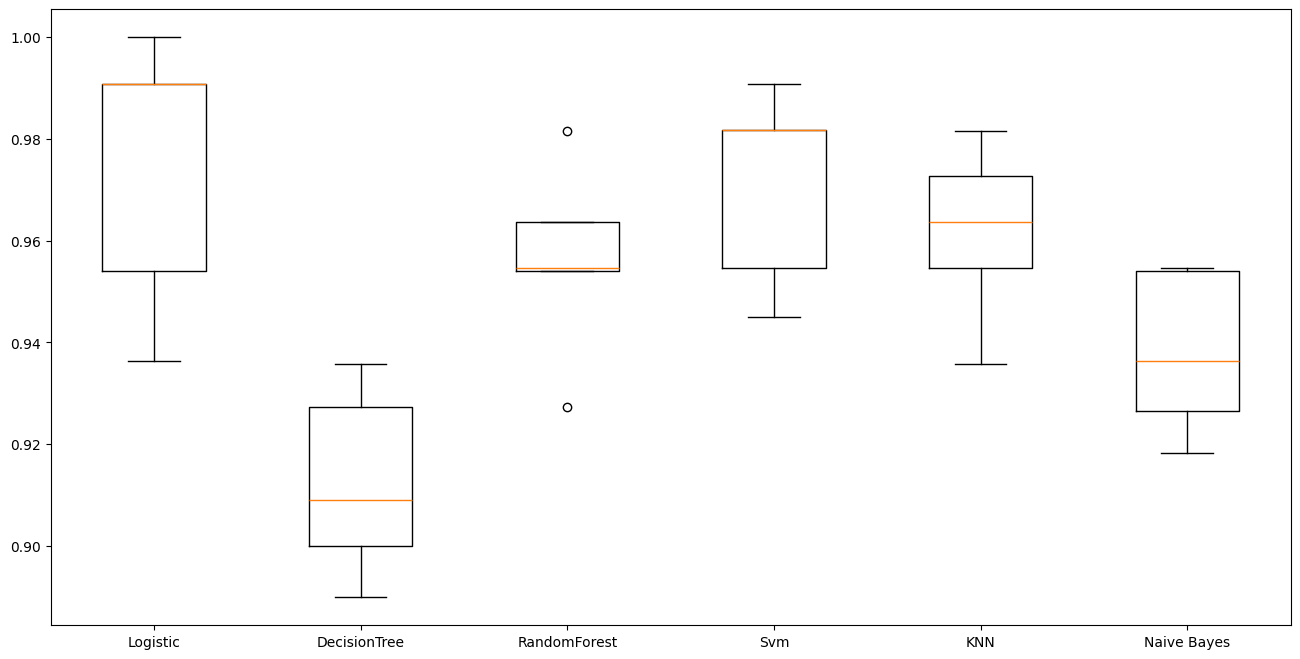

In [28]:
plt.figure(figsize=(16,8))
plt.boxplot(results,labels=models.keys())
plt.show()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

for name, model in models.items():
    model.fit(x_train, y_train) 
    print(f'This is the {model} model with all accuracy')
    
    train_score = model.score(x_train, y_train)
    print(f"{name} train Accuracy: {round(train_score*100,2)}%")
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} test Accuracy: {round(accuracy*100,2)}%")
    
    print('===========================================')
    

This is the LogisticRegression() model with all accuracy
Logistic train Accuracy: 98.4%
Logistic test Accuracy: 100.0%
This is the DecisionTreeClassifier() model with all accuracy
DecisionTree train Accuracy: 100.0%
DecisionTree test Accuracy: 92.73%
This is the RandomForestClassifier() model with all accuracy
RandomForest train Accuracy: 100.0%
RandomForest test Accuracy: 94.55%
This is the SVC() model with all accuracy
Svm train Accuracy: 98.63%
Svm test Accuracy: 98.18%
This is the KNeighborsClassifier() model with all accuracy
KNN train Accuracy: 97.49%
KNN test Accuracy: 96.36%
This is the GaussianNB() model with all accuracy
Naive Bayes train Accuracy: 94.06%
Naive Bayes test Accuracy: 95.45%


In [30]:
model = LogisticRegression()

model.fit(x_train, y_train) 

LogisticRegression()

In [31]:
print(f'This is the {model} model with all accuracy')
    
train_score = model.score(x_train, y_train)
print(f"{name} train Accuracy: {round(train_score*100,2)}%")
    
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{name} test Accuracy: {round(accuracy*100,2)}%")

This is the LogisticRegression() model with all accuracy
Naive Bayes train Accuracy: 98.4%
Naive Bayes test Accuracy: 100.0%


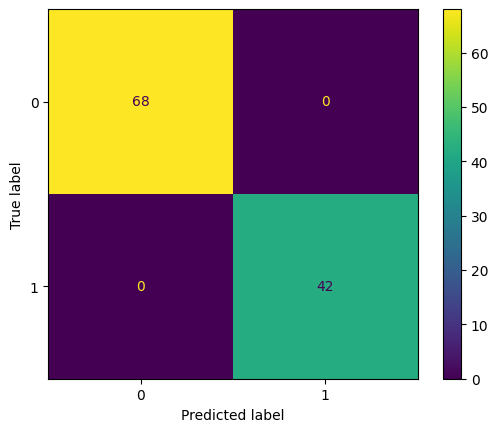

In [32]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [33]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        42

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

